# Glass Identification Dataset

Problem Statement: The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

Id number: 1 to 214 RI: refractive index Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) Mg: Magnesium Al: Aluminum Si: Silicon K: Potassium Ca: Calcium Ba: Barium Fe: Iron Type of glass: (class attribute) 1- building_windows_float_processed 2- building_windows_non_float_processed 3- vehicle_windows_float_processed 4- vehicle_windows_non_float_processed (none in this database) 5- containers 6- tableware 7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).

Predict : Type of glass

In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("glass.csv",header=None)
df


,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#Adding column names to the dataframe
df.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])

No. of Rows : 214
No. of Columns : 11


In [5]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id number', 'Type of glass'], float64: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']}

In [6]:
# Observations:

# There are int and float data types available in the dataset

In [7]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

float64    9
int64      2
dtype: int64

In [8]:
# Observations:

# No. of float datatypes: 9

# No. of int datatypes: 2

# Updating target column per the problem statement

In [9]:
# Per the project problem statement, 
# set an arbitrary cutoff for your dependent variable (Type of glass) at e.g. 5 or higher getting classified as class-'1' 
# and the remaining as class-'0'
# Hence updating the target column "Type of glass" accordingly
# New target column is "Type of glass1"
df["Type of glass1"]=[1 if i>=5 else 0 for i in df["Type of glass"]]
df["Type of glass1"] # updated target column


0      0
1      0
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: Type of glass1, Length: 214, dtype: int64

In [10]:
# Observation:

# 0 - Window glass

# 1- Non-window glass

In [11]:
#check for the number of classes

df["Type of glass1"].nunique()

2

In [12]:
#check for the number of classes after upadating column

df["Type of glass1"].unique()

array([0, 1])

In [13]:
#check for imbalance in the target column

df["Type of glass1"].value_counts()

0    163
1     51
Name: Type of glass1, dtype: int64

In [14]:
#checking the dtype of target variable

df.dtypes["Type of glass1"]

dtype('int64')

In [15]:
# Dropping original target column "Type of glass"

df.drop("Type of glass",axis=1,inplace=True)  
df.head(5)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass1
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


# Data Integrity Check

In [16]:
# Checking for the presence of any whitespaces, '?', 'NA', '-' in the dataset

In [17]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

In [18]:
# Observations:

# No White spaces, 'NA', 'N/A', '-', '?', ' ?' present in the dataframe

# Duplicate Values Check

In [19]:
df.duplicated().sum()

0

In [20]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass1


In [21]:
# Observations:

# No duplicate values present in the dataframe

# Null Values Handling

In [22]:
# Checking the sum of null values for all columns

df.isnull().sum().sum()

0

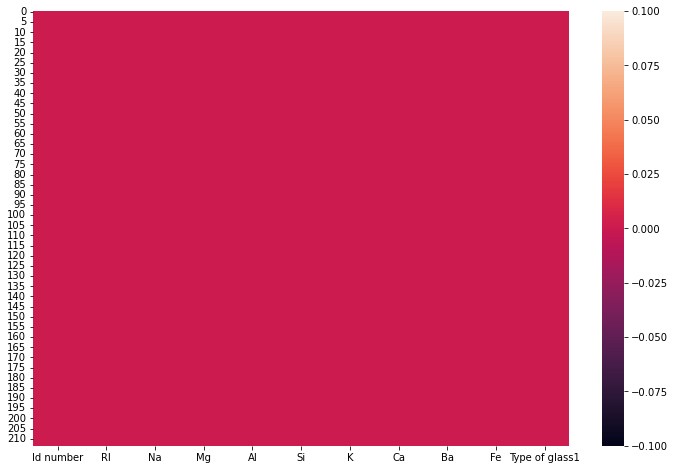

In [23]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull())
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id number       214 non-null    int64  
 1   RI              214 non-null    float64
 2   Na              214 non-null    float64
 3   Mg              214 non-null    float64
 4   Al              214 non-null    float64
 5   Si              214 non-null    float64
 6   K               214 non-null    float64
 7   Ca              214 non-null    float64
 8   Ba              214 non-null    float64
 9   Fe              214 non-null    float64
 10  Type of glass1  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [25]:
# Observations:

# No null values present in the dataframe

# Segregating columns based on data type for better EDA

In [26]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id number', 'Type of glass1'], float64: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']}

In [27]:
# Find continuous variables
continuous = [var for var in df.columns if df[var].dtype=='float']
print('There are {} continuous variables\n'.format(len(continuous)))
print('The continuous variables are :', continuous)
x=df[continuous]

There are 9 continuous variables

The continuous variables are : ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


In [28]:
# Dropping unneccessary column 'Id number' as it will not contribute to model training
df.drop(['Id number'],axis=1,inplace=True)

In [29]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass1
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [30]:
# Renaming Target Column
df.rename(columns = {'Type of glass1':'Type of glass'}, inplace = True)
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [31]:
y=df["Type of glass"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Type of glass, dtype: int64

# Statistical Summary:

In [32]:
# Statistical summary for continuous data

x.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [33]:
# Observations:

# Count is same for all columns. Hence no null values are present

# I feel that that there is skewness in the data

# Large variation between 75% and max for K,Ca indicates outliers

# Less variation between 75% and max for Na,Ba indicates less number of outliers

# Standard deviation is not high.It indicates the dataspread is low.i.e,range is less

# Visualization of data

# Univariate Graphical Analysis

Minimum RI is 1.51115 % and Maximum RI is 1.53393 %
Minimum Na is 10.73 % and Maximum Na is 17.38 %


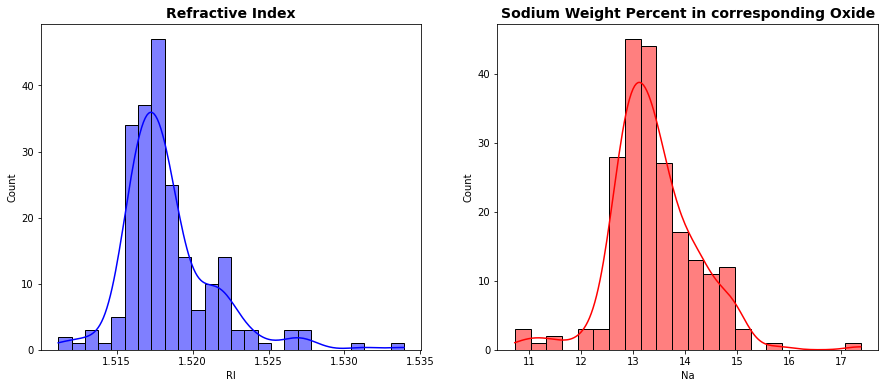

In [34]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x['RI'],kde=True,color='b')
plt.title('Refractive Index',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(x['Na'],kde=True,color='r')
plt.title('Sodium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
print('Minimum RI is {} % and Maximum RI is {} %'.format(x['RI'].min(),x['RI'].max()))
print('Minimum Na is {} % and Maximum Na is {} %'.format(x['Na'].min(),x['Na'].max()))
plt.show()

In [35]:
# Observations:

# Both are not normally distributed

# Both features are having right skewed data

Minimum Mg is 0.0 % and Maximum Mg is 4.49 %
Minimum Al is 0.29 % and Maximum Al is 3.5 %


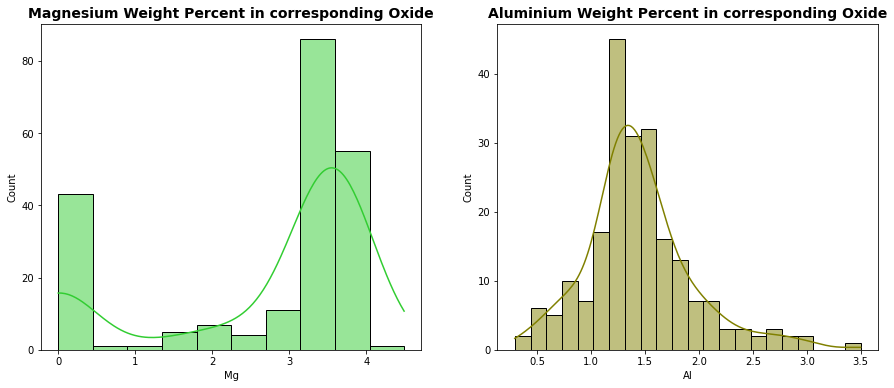

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x['Mg'],kde=True,color='limegreen')
plt.title('Magnesium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(x['Al'],kde=True,color='olive')
plt.title('Aluminium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
print('Minimum Mg is {} % and Maximum Mg is {} %'.format(x['Mg'].min(),x['Mg'].max()))
print('Minimum Al is {} % and Maximum Al is {} %'.format(x['Al'].min(),x['Al'].max()))
plt.show()

In [37]:
# Observations:

# Both the columns are not normally distributed.

# "Magnesium" is having left skewed data and "Aluminium is having right skewed data

Minimum Si is 69.81 % and Maximum Si is 75.41 %
Minimum K is 0.0 % and Maximum K is 6.21 %


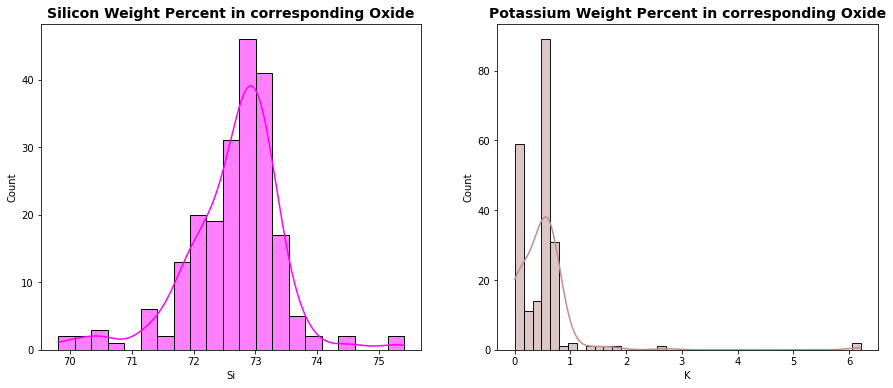

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x['Si'],kde=True,color='magenta')
plt.title('Silicon Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(x['K'],kde=True,color='rosybrown')
plt.title('Potassium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
print('Minimum Si is {} % and Maximum Si is {} %'.format(x['Si'].min(),x['Si'].max()))
print('Minimum K is {} % and Maximum K is {} %'.format(x['K'].min(),x['K'].max()))
plt.show()

In [39]:
# Observations:

# Both the columns are not normally distributed

# "Silicon" is having left skewed data where as "Potassium" is having right skewed data



Minimum Ca is 5.43 % and Maximum Ca is 16.19 %
Minimum Ba is 0.0 % and Maximum Ba is 3.15 %


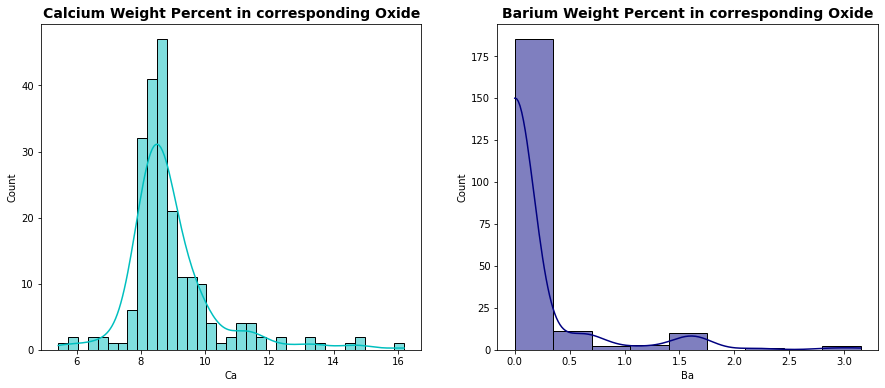

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x['Ca'],kde=True,color='c')
plt.title('Calcium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(x['Ba'],kde=True,color='navy')
plt.title('Barium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
print('Minimum Ca is {} % and Maximum Ca is {} %'.format(x['Ca'].min(),x['Ca'].max()))
print('Minimum Ba is {} % and Maximum Ba is {} %'.format(x['Ba'].min(),x['Ba'].max()))
plt.show()

In [41]:
#Observations:

# Both the columns are not normally distributed.

# Both features are having right skewed data

Minimum Fe is 0.0 % and Maximum Fe is 0.51 %


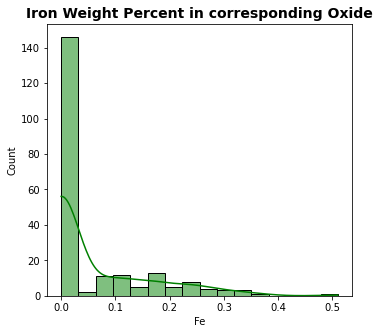

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x['Fe'],kde=True,color='g')
plt.title('Iron Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
print('Minimum Fe is {} % and Maximum Fe is {} %'.format(x['Fe'].min(),x['Fe'].max()))
plt.show()

In [43]:
# Observations:

# "Iron" column is not normally distributed.

# It is having right skewed data

# Bivariate Graphical Analysis

# Studying the relationship of all features with target variable

<Figure size 864x504 with 0 Axes>

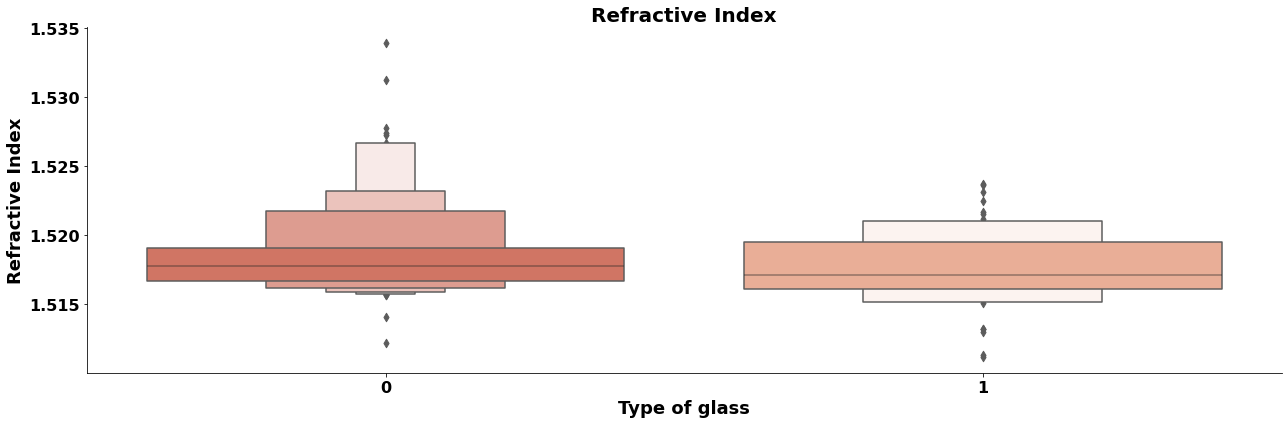

In [44]:
#0 - Window glass
#1- Non-window glass

plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y='RI',data= df,
            kind="boxen",height=6, aspect=3)
plt.title("Refractive Index",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Refractive Index', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [45]:
# Observations:

# Majority of both window and non-window glasses are having refrative index in the range between 1.515 and 1.520

# Refractive index is higher in window glasses compared to non-window glasses

<Figure size 864x504 with 0 Axes>

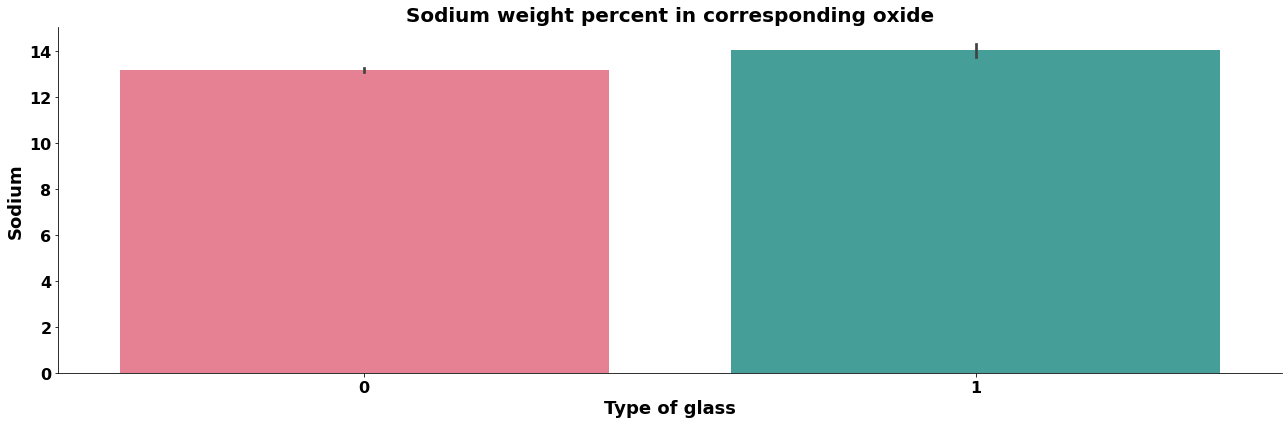

In [46]:
# Sodium 

plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y='Na',data= df,
            kind="bar",height=6, aspect=3,palette='husl')
plt.title("Sodium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Sodium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [47]:
# Observations:

# Sodium percent is almost similar in both type of glasses

<Figure size 864x504 with 0 Axes>

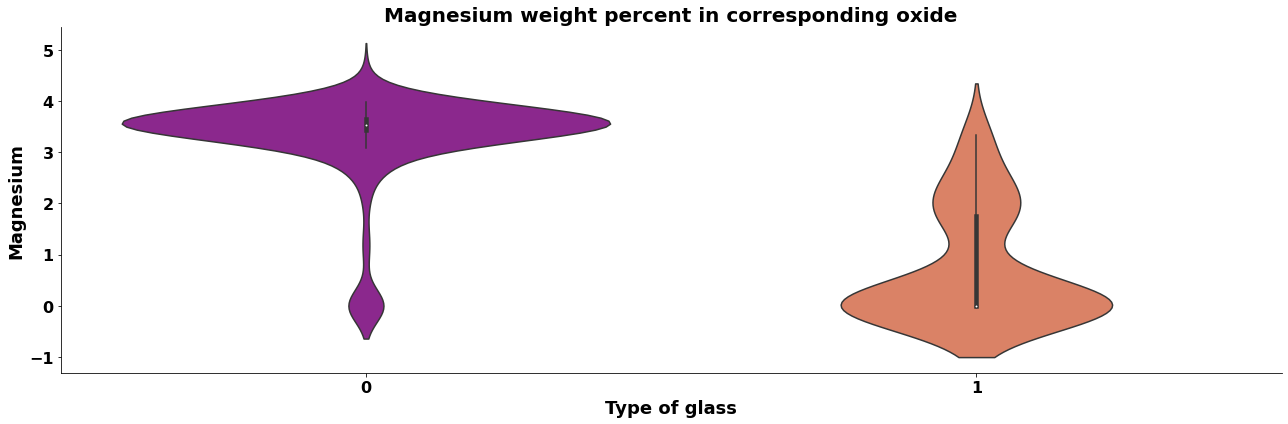

In [48]:
# Mg: Magnesium

plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[2],data= df,
            kind="violin",height=6, aspect=3,palette='plasma')
plt.title("Magnesium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Magnesium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()




In [49]:
# Observations:

# Majority of window glasses are having "Magnesium" content in the range between 3 to 4

# Majority of non-window glasses are not having "Magnesium" content

# No. of window glasses with "Magnesium" are high compared to non-window glasses

<Figure size 864x504 with 0 Axes>

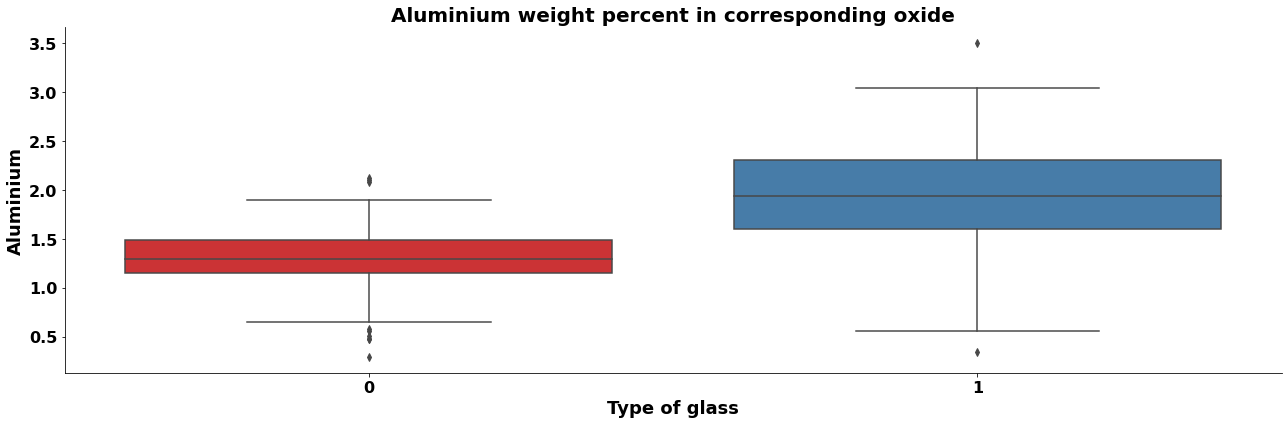

In [50]:
# Al: Aluminum

plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[3],data= df,
            kind="box",height=6, aspect=3,palette='Set1')
plt.title("Aluminium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Aluminium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [51]:
# Observations:

# There are large number of non-window glasses with "Aluminium" content compared to window-glasses

# Majority of window glasses are having "Aluminium" content in the range between 1 to 1.5

# Majority of non-window glasses are having "Aluminium" content in the range between 1.5 to 2.5

<Figure size 864x504 with 0 Axes>

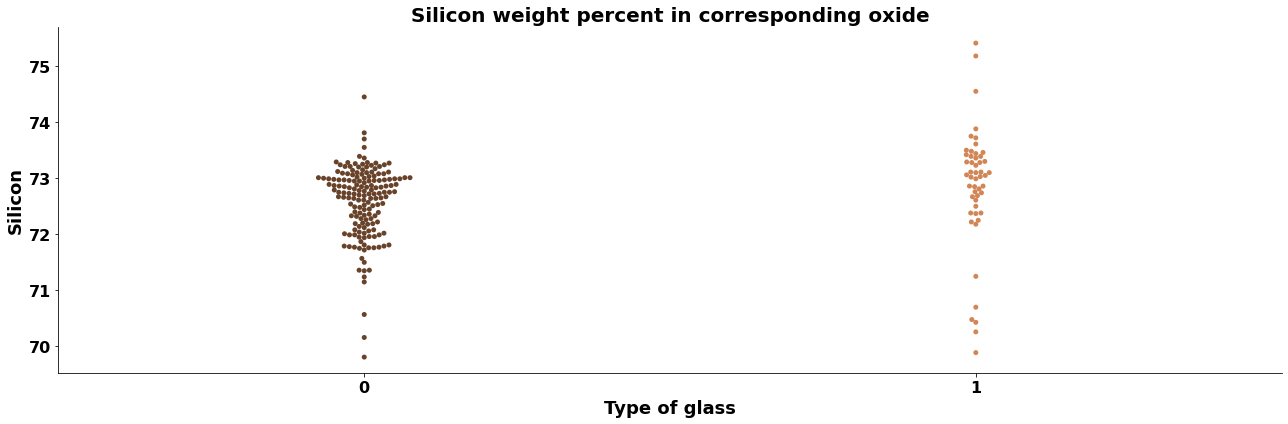

In [52]:
#Si: Silicon

plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[4],data= df,
            kind="swarm",height=6, aspect=3,palette='copper')
plt.title("Silicon weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Silicon', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()



In [53]:
# Observations:

# There are large number of window glasses with "Silicon" content compared to non-window-glasses

# Majority of window glasses are having "Silicon" content in the range between 71.5 to 73.5

# Majority of non-window glasses are having "Silicon" content in the range between 72 to 73
    

<Figure size 864x504 with 0 Axes>

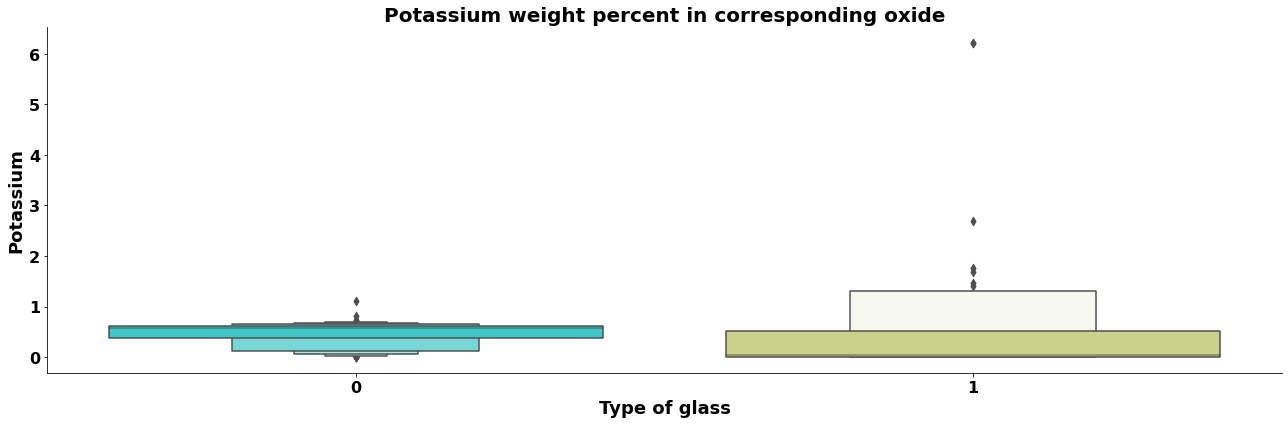

In [54]:
# K: Potassium

plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[5],data= df,
            kind="boxen",height=6, aspect=3,palette='rainbow')
plt.title("Potassium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Potassium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [55]:
# Observations:

# Looks like both type of glasses are not having much potassium content

# however there are some outliers exist in non-window glasses

<Figure size 864x504 with 0 Axes>

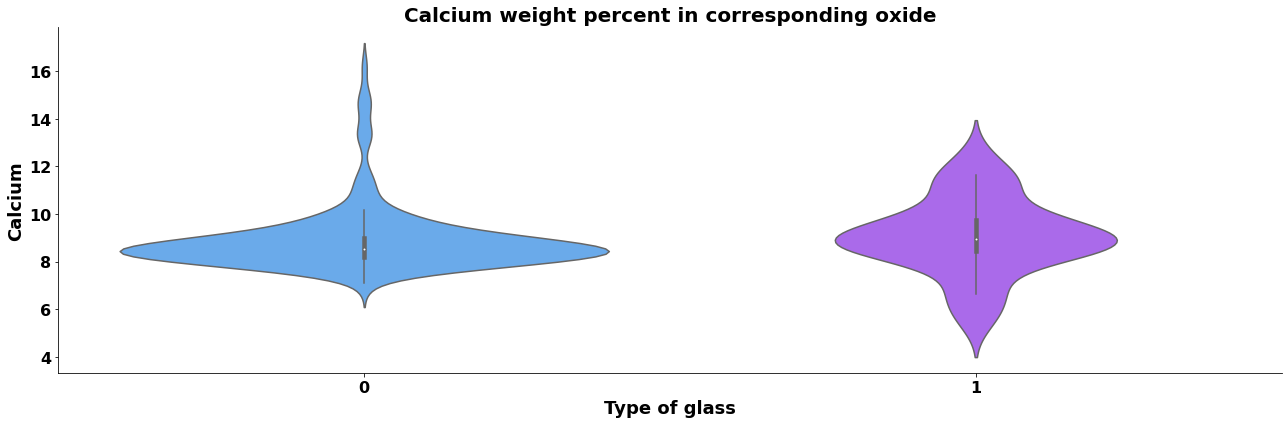

In [56]:
# Ca: Calcium

plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[6],data= df,
            kind="violin",height=6, aspect=3,palette='cool')
plt.title("Calcium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Calcium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [57]:
# Observations:

# There are large number of window glasses with "Calcium" content compared to non-window-glasses

# Majority of both window and non-window glasses are having "Calcium" content in the range between 7 to 9

# There are few window glasses with "Calcium" content above 10

<Figure size 864x504 with 0 Axes>

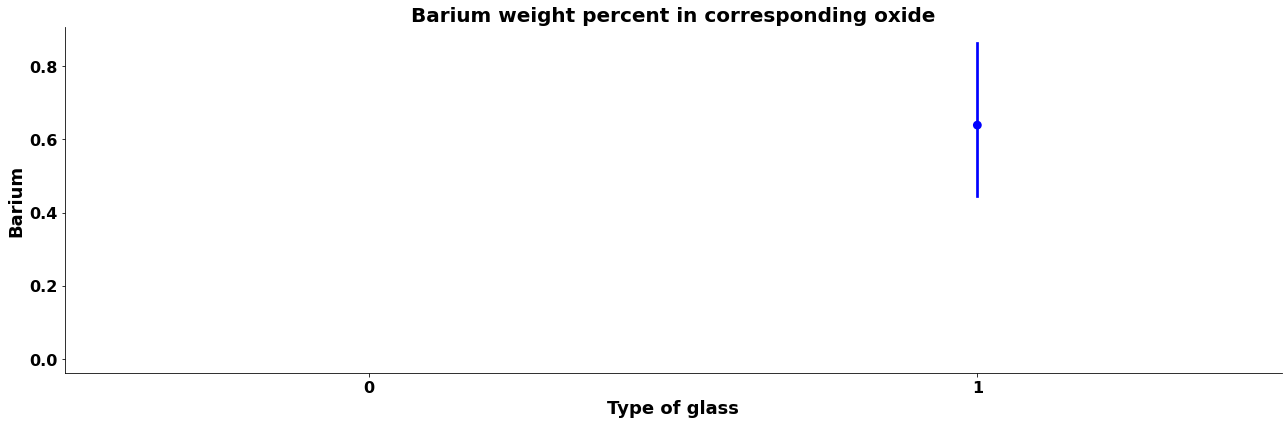

In [58]:
# Ba: Barium

plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[7],data= df,
            kind="point",height=6, aspect=3,palette='flag')
plt.title("Barium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Barium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [59]:
# Observations:

# There are no window glasses with "Barium" content

# Barium range with non-window glasses is in between 0.4 to 0.8

<Figure size 864x504 with 0 Axes>

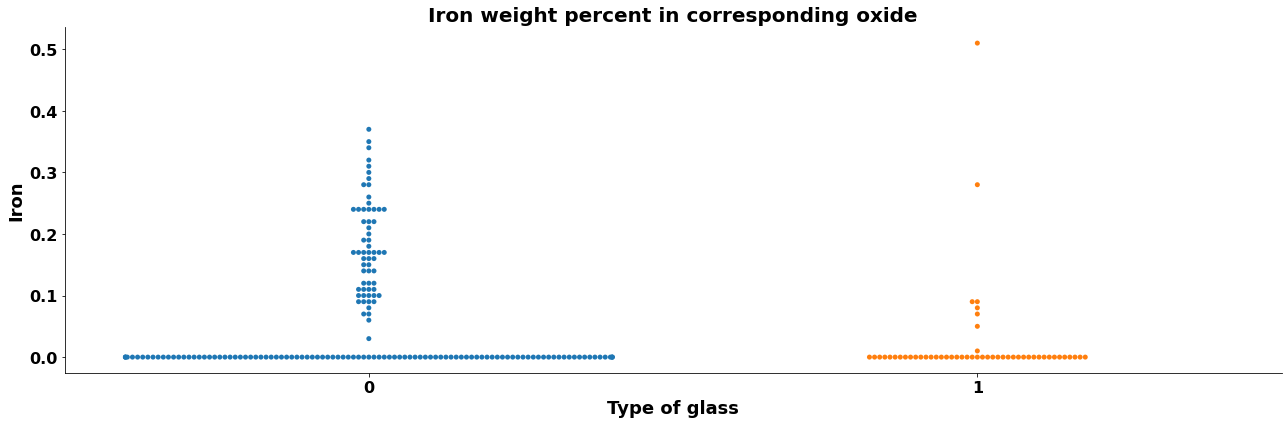

In [60]:
# Fe: Iron

plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[8],data= df,
            kind="swarm",height=6, aspect=3,palette='tab10')
plt.title("Iron weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Iron', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [61]:
# Observations:

# There are large number of window glasses with "Iron" content compared to non-indow-glasses

# Interestingly there are multiple glasses in both window and non-window categories don't have any "Iron" content

# Max "Iron" percent range is upto 0.4 for window glasses

# There are outliers in non-window glass category

# Multivariate Graphical Analysis

In [62]:
x.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

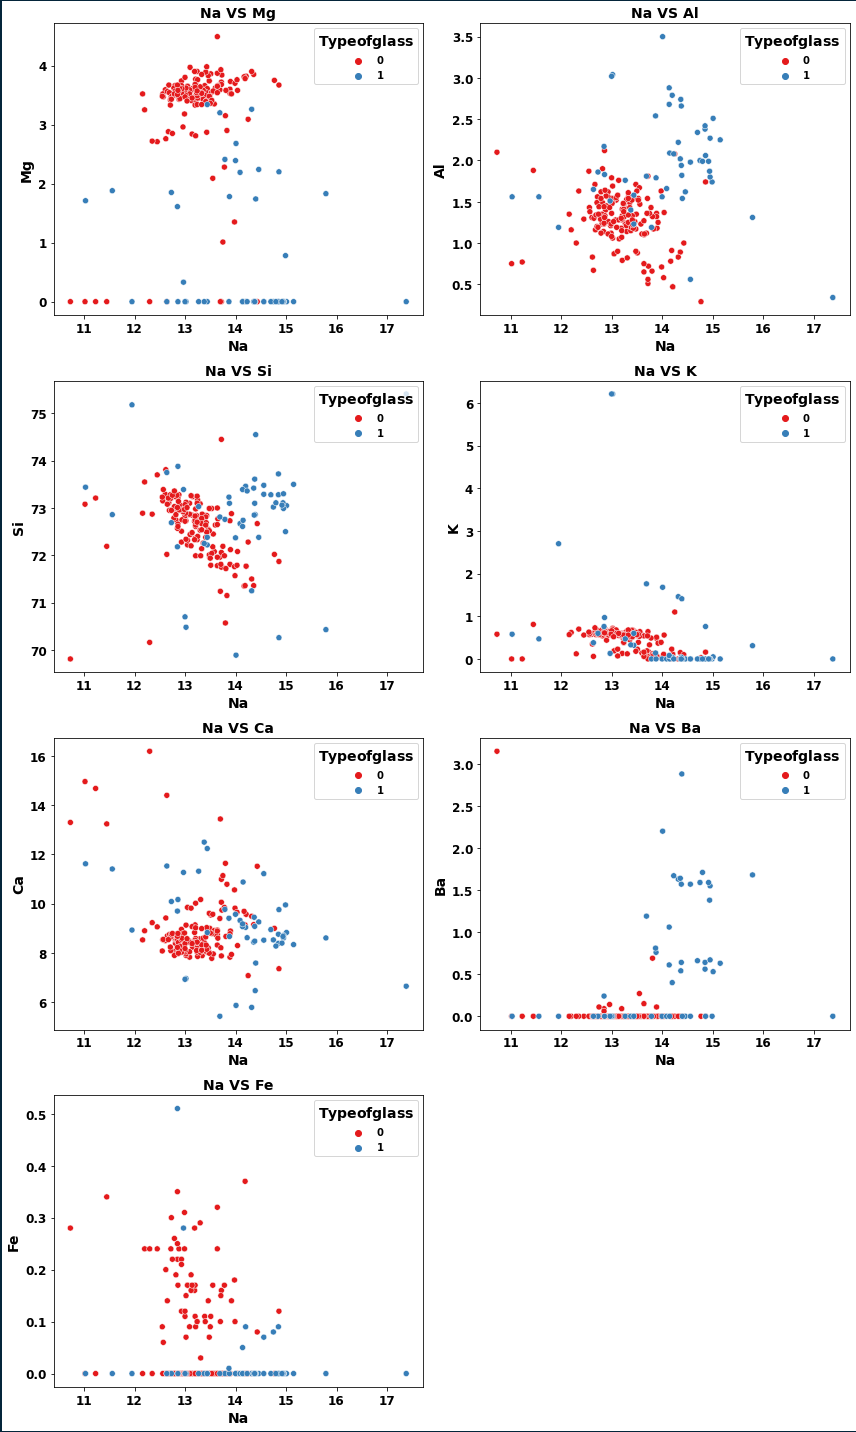

In [63]:
# Checking the relationship of all features with "Sodium" for both classes of target variable
features = ['Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Na",y=col,hue="Type of glass",palette = 'Set1')
    plt.title(('Na VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Na', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()


In [64]:
# Sodium Observations:

# Both "Sodium" and "Magnesium" contents are high in window type of glasses

# Remainig chemical composition other than "Magnesium" is decreaing with increasing in "Sodium" content in window type of glasses

# "Barium" content is increasing along with "Sodium" for non-window type of glass

# Remainig chemical composition other than "Barium" is decreaing with increasing in "Sodium" content in non-window type of glasses

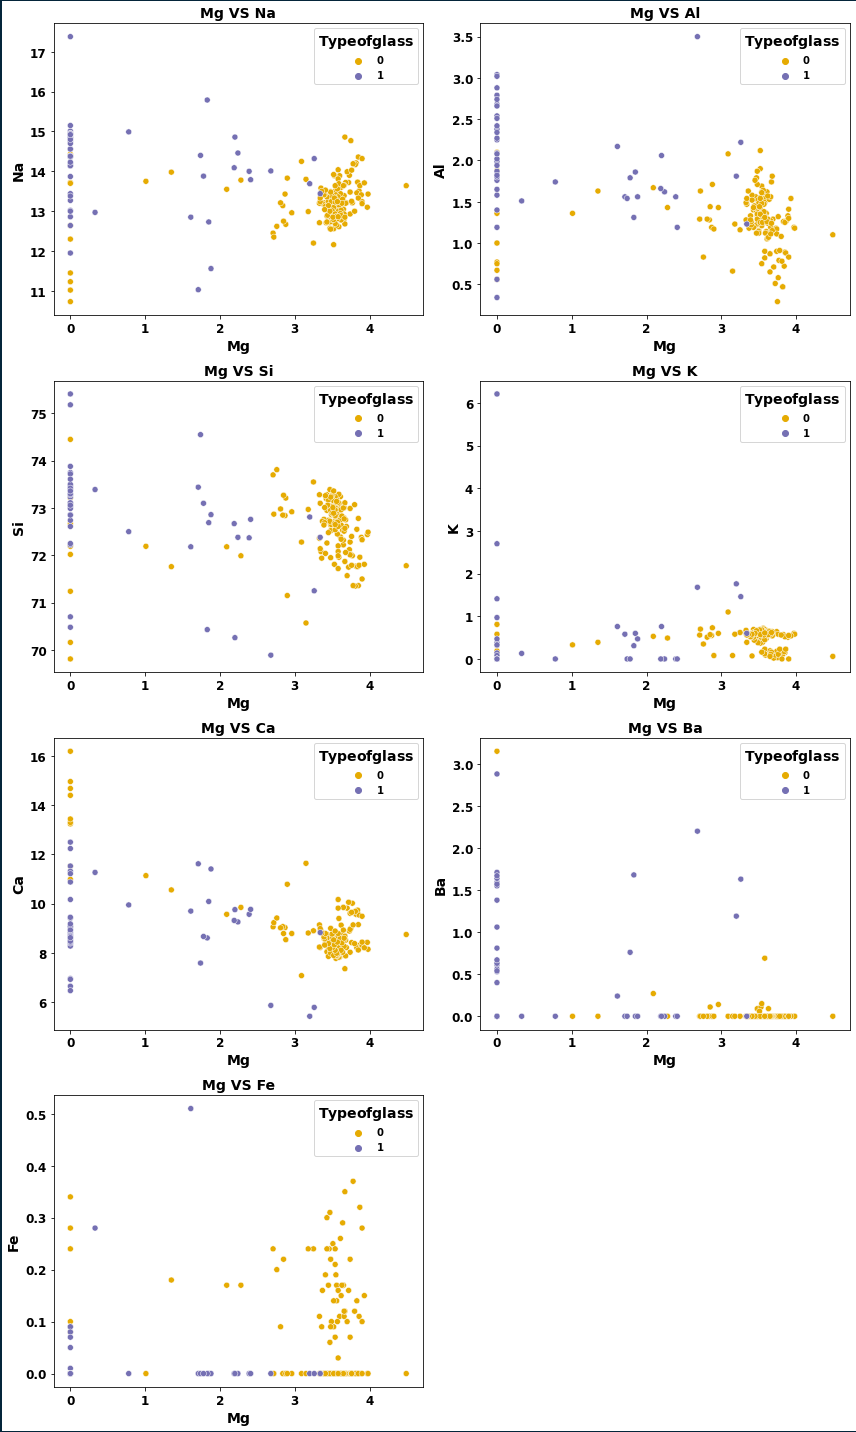

In [65]:
# Checking the relationship of all features with "Magnesium" for both classes of target variable
features = ['Na', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Mg",y=col,hue="Type of glass",palette = 'Dark2_r')
    plt.title(('Mg VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Mg', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

In [66]:
# Magnesium Observations:

# "Sodium" and "Silicon" contents are increasing along with "Magnesium" for window type of glass

# Remainig chemical compositions are decreaing with increasing in "Magnesium" content in window type of glasses

# Majority of chemical compositions are decreaing with increasing in "Magnesium" content in non-window type of glasses

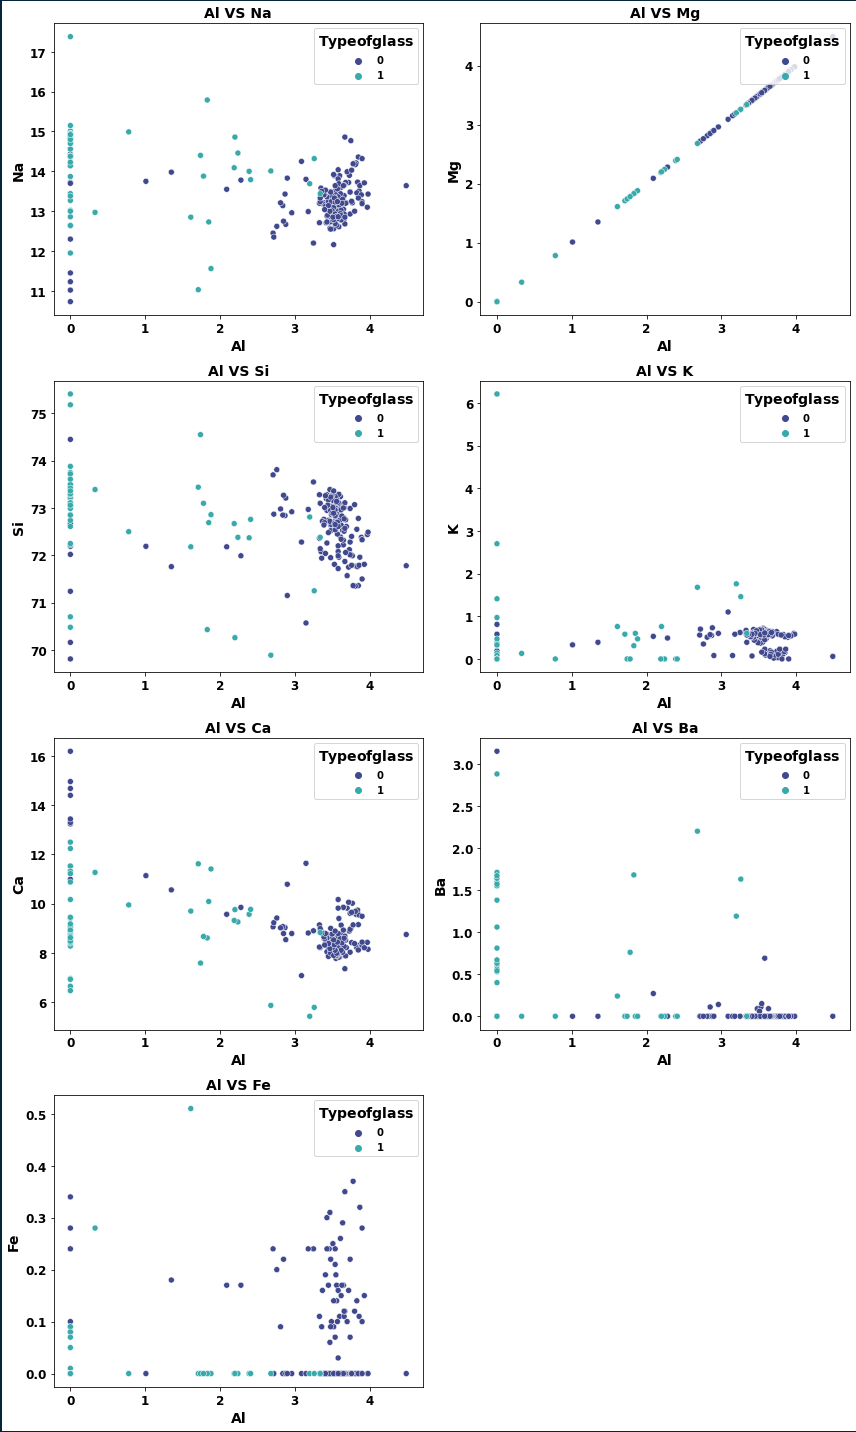

In [67]:
# Checking the relationship of all features with "Aluminium" for both classes of target variable
features = ['Na', 'Mg', 'Si', 'K', 'Ca', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Mg",y=col,hue="Type of glass",palette = 'mako')
    plt.title(('Al VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Al', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

In [68]:
# Aluminium Observations:

# Both "Potassium" and "Silicon" contents are increasing along with "Aluminium" in window type of glasses

# Remainig chemical compositions are decreaing with increasing in "Aluminium" content in window type of glasses

# "Barium" and "Potassium" contents are increasing along with "Aluminium" for non-window type of glass

# Majority of remainig chemical composition are decreaing with increasing in "Aluminium" content in non-window type of glasses

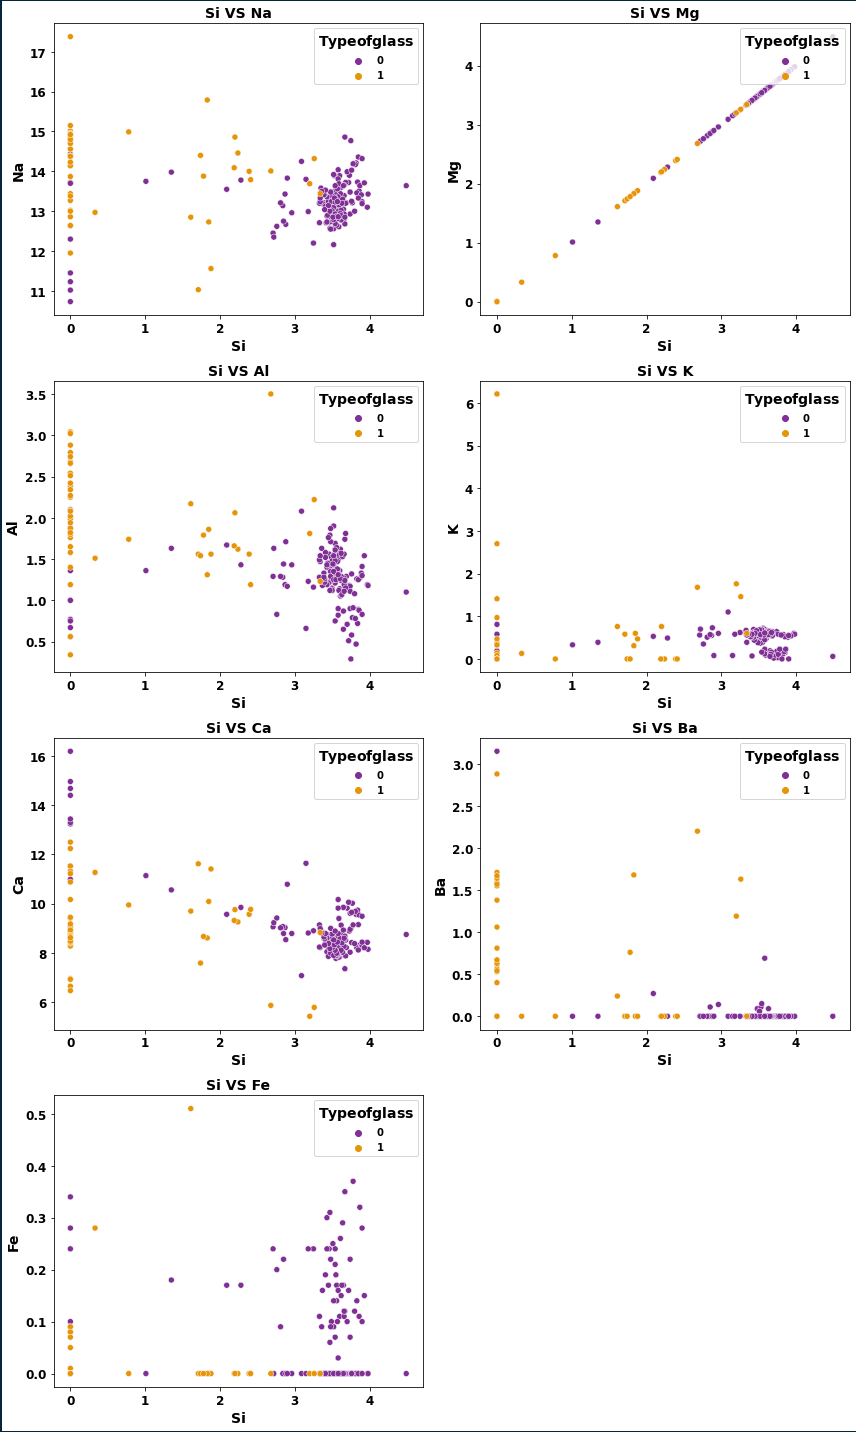

In [69]:
# Checking the relationship of all features with "Silicon" for both classes of target variable
features = ['Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Mg",y=col,hue="Type of glass",palette = 'CMRmap')
    plt.title(('Si VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Si', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

In [70]:
# Silicon Observations:

# Both "Potassium", "Aluminium" and "Magnesium" contents are increasing along with "Silicon" in window type of glasses

# Remainig chemical compositions are decreaing with increasing in "Silicon" content in window type of glasses

# "Calcium" and "Sodium" contents are increasing along with "Silicon" for non-window type of glass

# Majority of remainig chemical composition are decreaing with increasing in "Silicon" content in non-window type of glasses

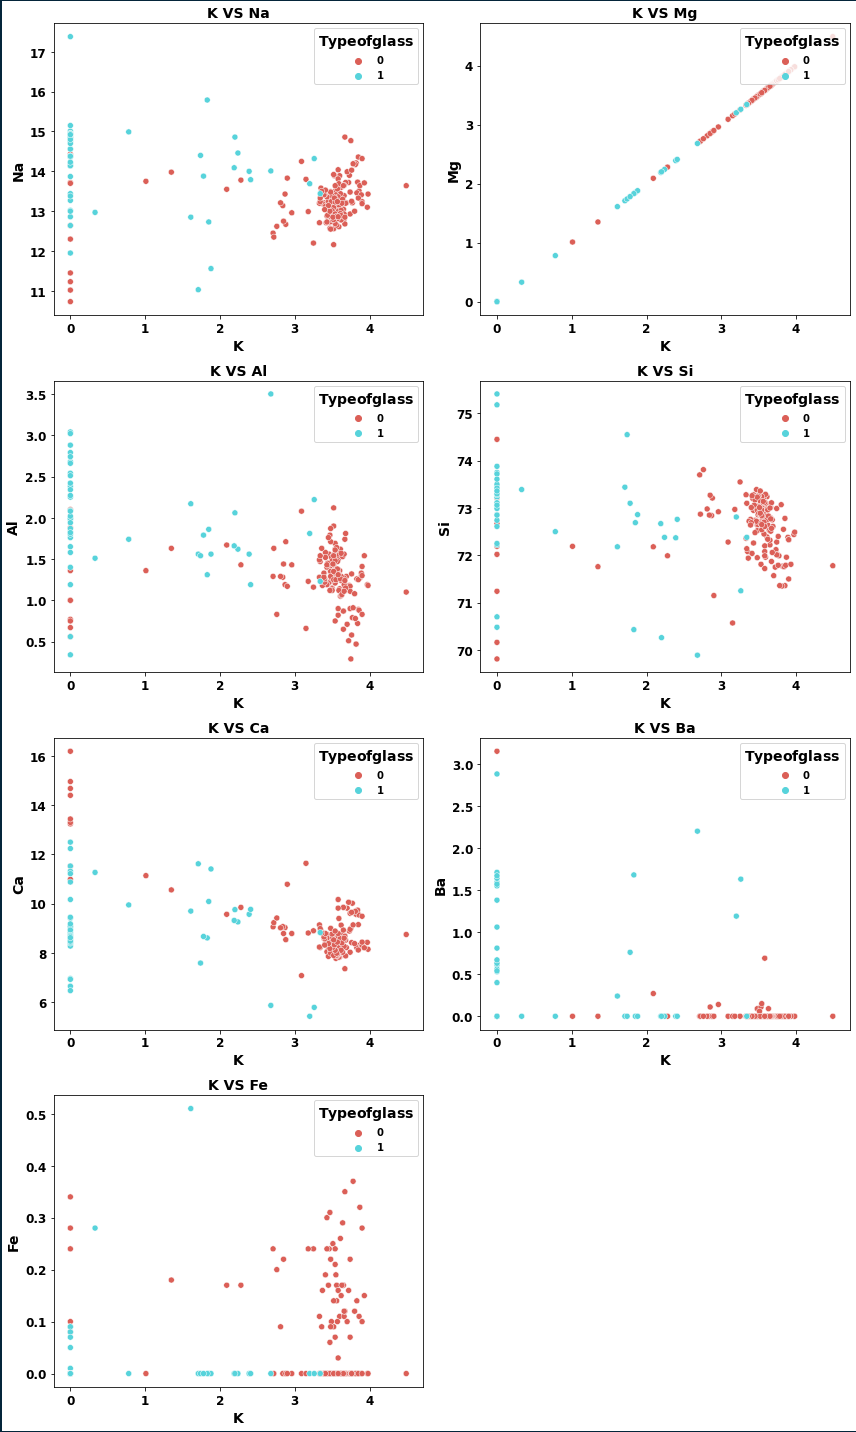

In [71]:
# Checking the relationship of all features with "Potassium" for both classes of target variable
features = ['Na', 'Mg', 'Al', 'Si', 'Ca', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Mg",y=col,hue="Type of glass",palette = 'hls')
    plt.title(('K VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('K', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

In [72]:
# Potassium Observations:

# Both "Silicon" and "Aluminium" contents are increasing along with "Potassium" in window type of glasses

# Remainig chemical compositions are decreaing with increasing in "Potassium" content in window type of glasses

# "Aluminum" content is increasing along with "Potassium" for non-window type of glass

# Majority of remainig chemical composition are decreaing with increasing in "Potassium" content in non-window type of glasses

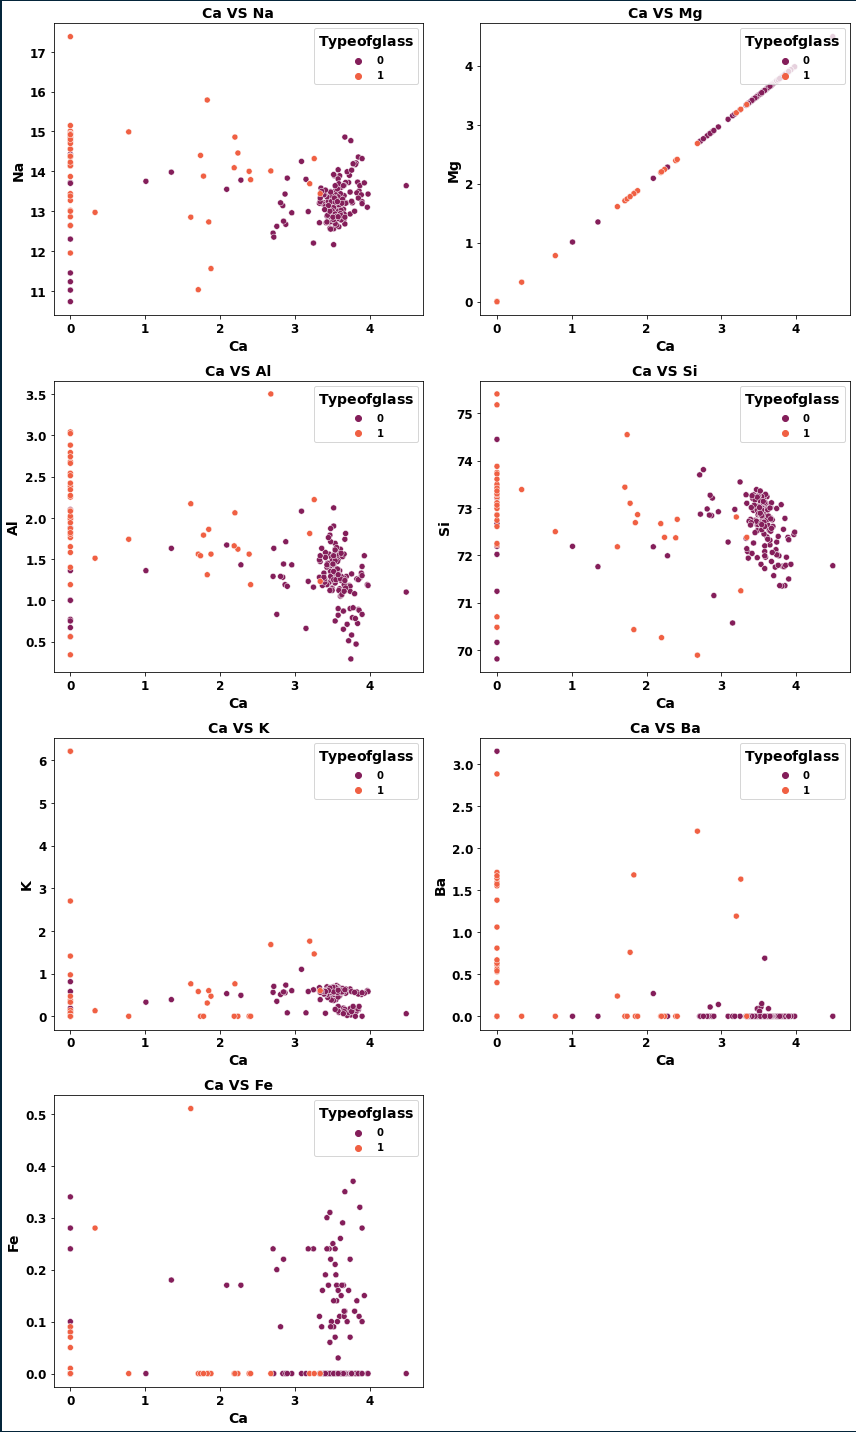

In [73]:
# Checking the relationship of all features with "Calcium" for both classes of target variable
features = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Mg",y=col,hue="Type of glass",palette = 'rocket')
    plt.title(('Ca VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Ca', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

In [74]:
# Calcium Observations:

# "Barium" content is increasing along with "Calcium" in window type of glasses

# Remainig chemical compositions are decreaing with increasing in "Calcium" content in window type of glasses

# "Silicon" content is increasing along with "Calcium" for non-window type of glass

# Majority of remainig chemical composition are decreaing with increasing in "Calcium" content in non-window type of glasses


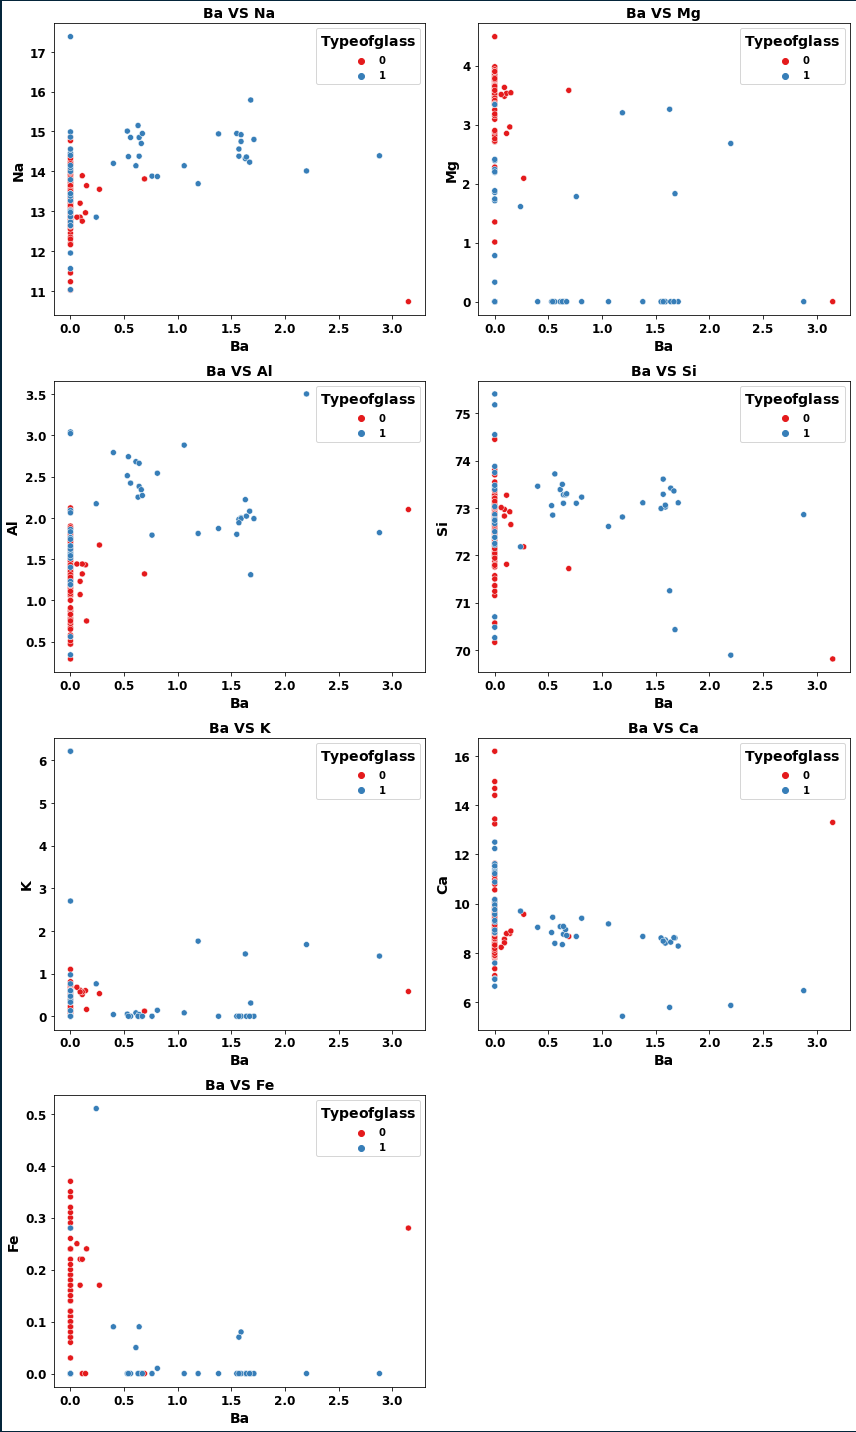

In [75]:
# Checking the relationship of all features with "Barium" for both classes of target variable
features = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Ba",y=col,hue="Type of glass",palette = 'Set1')
    plt.title(('Ba VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Ba', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

In [76]:
# Barium Observations:

# "Calcium" and "Aluminium" contents are increasing along with "Barium" in window type of glasses

# Remainig chemical compositions are decreaing with increasing in "Barium" content in window type of glasses

# "Aluminium" and "Sodium" contents are increasing along with "Barium" for non-window type of glass

# Majority of remainig chemical composition are decreaing with increasing in "Barium" content in non-window type of glasses

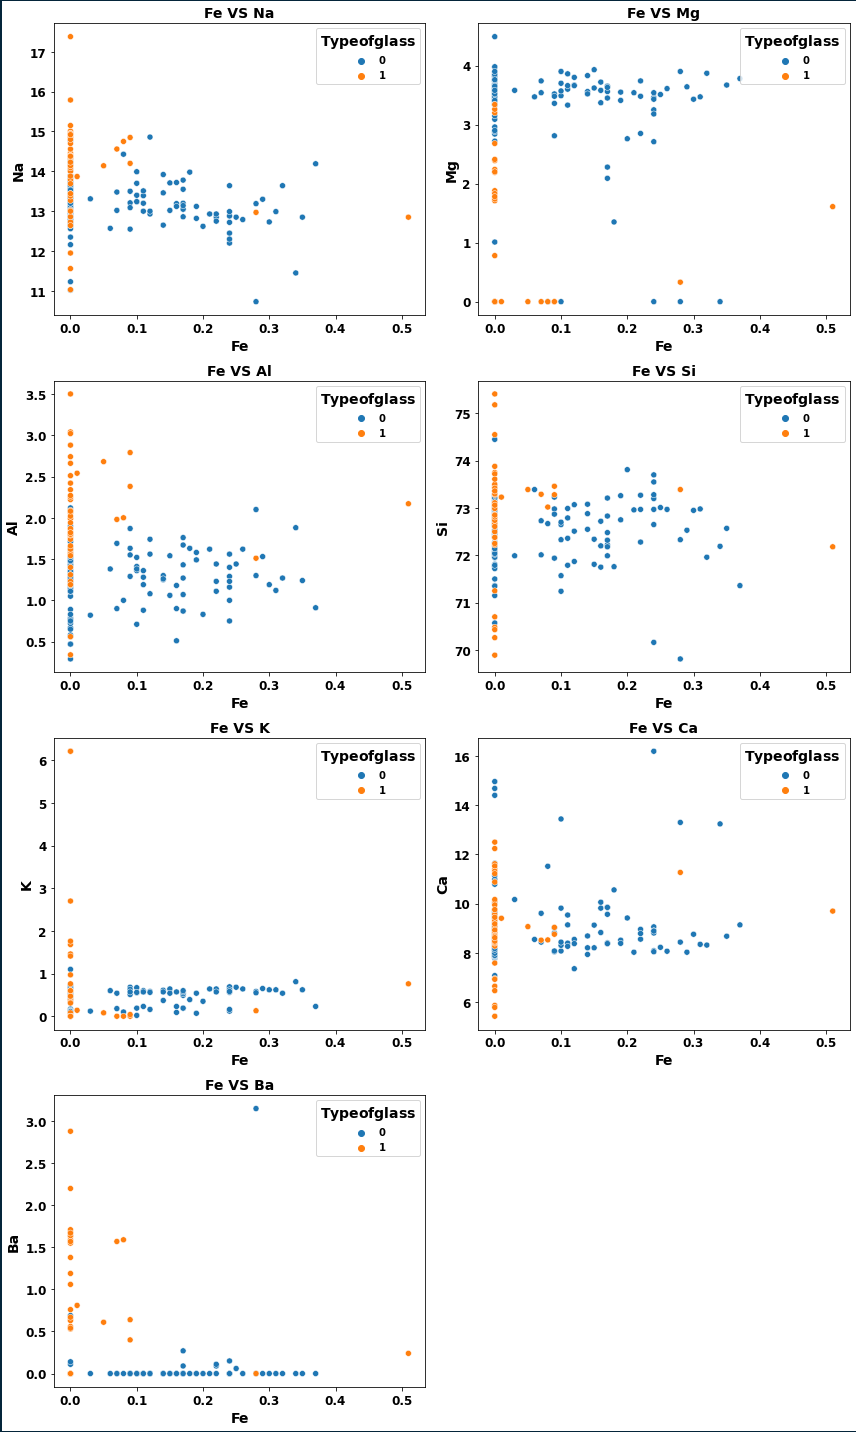

In [77]:
# Checking the relationship of all features with "Iron" for both classes of target variable
features = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Fe",y=col,hue="Type of glass",palette = 'tab10')
    plt.title(('Fe VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Fe', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

In [78]:
# Iron Observations:

# Not much variation in the chemical composition of all contents with increasing in "Iron" content in window type of glasses

# "Calcium" and "Aluminium" contents are increasing along with "Iron" for non-window type of glass

# Majority of remaining chemical composition are decreaing with increasing in "Iron" content in non-window type of glasses


# Checking coefficients of correlation (r)

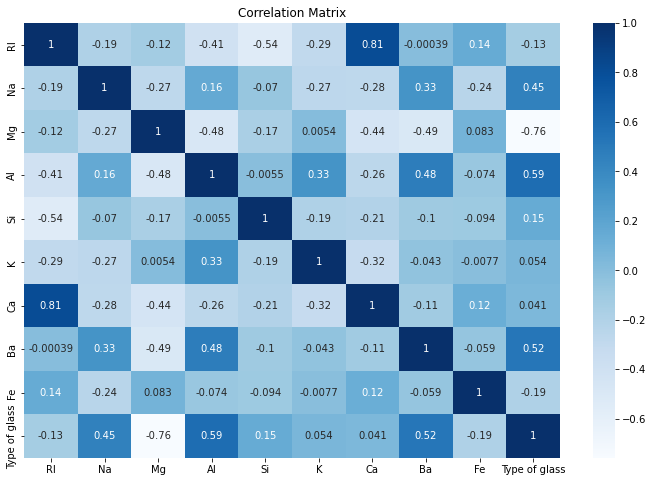

In [79]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_r,cmap="Blues",annot=True)
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.jpg")
plt.show()

In [80]:
corr_r["Type of glass"].sort_values(ascending=False) 

Type of glass    1.000000
Al               0.585928
Ba               0.523403
Na               0.452336
Si               0.148072
K                0.053774
Ca               0.040670
RI              -0.134327
Fe              -0.194903
Mg              -0.758289
Name: Type of glass, dtype: float64

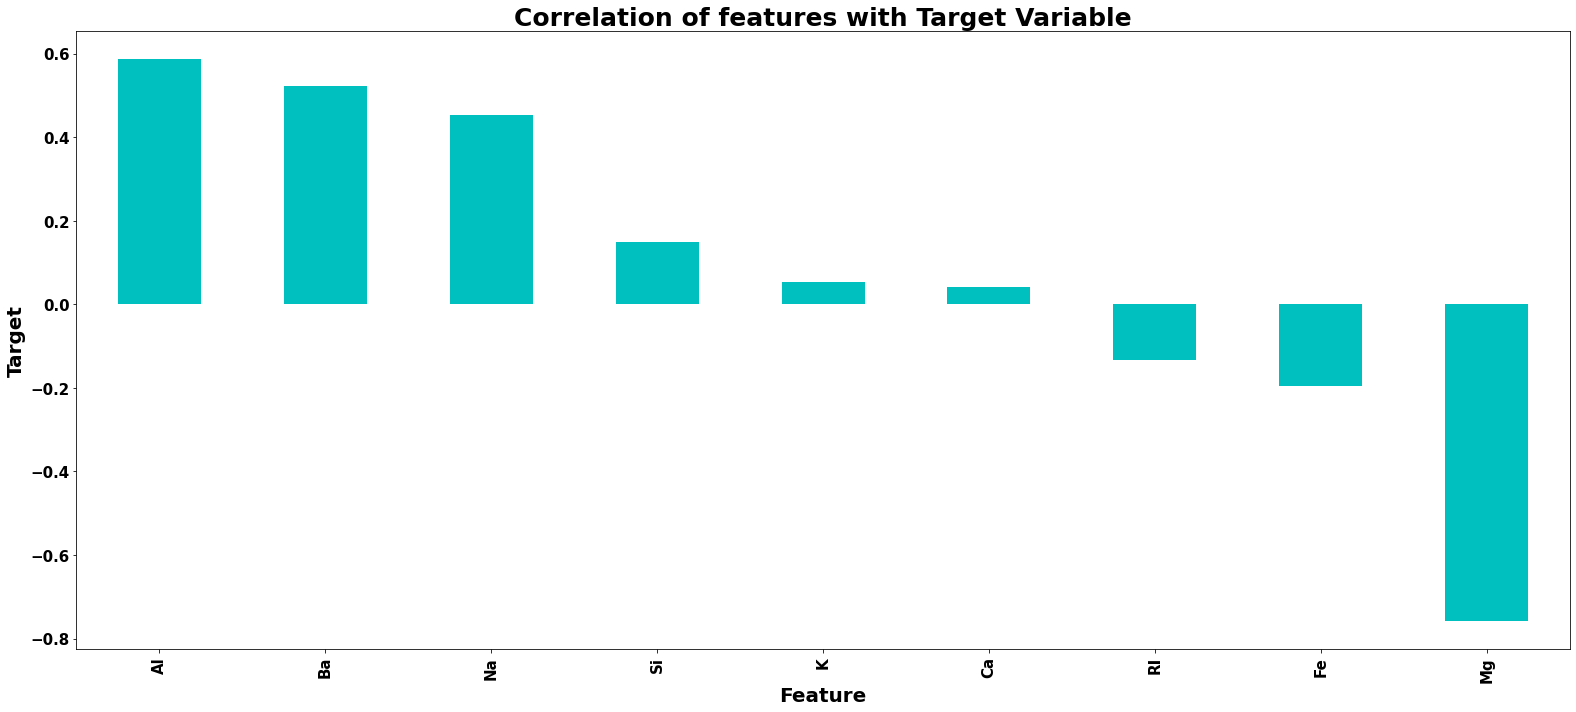

In [81]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
corr_r['Type of glass'].sort_values(ascending=False).drop(['Type of glass']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('Target',fontsize=20,fontweight='bold')
plt.title('Correlation of features with Target Variable',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [82]:
# Observations:

# Mg,Al,Ba are strongly correlated with target variable

# K,Ca are very weakly correlated with target variable

# Si,Ri,Fe are weakly correlated with target variable

# I will check feature scores from SelectKBest algorithm with chi square test

# will check if any features have lower score to take futher decisions.\

# Checking top features using SelectKBest algorithm

In [83]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

  Specs      Score
2    Mg  94.919699
7    Ba  82.412774
3    Al  12.615323
1    Na   2.167533
8    Fe   1.347517
5     K   0.527072
6    Ca   0.079667
4    Si   0.038564
0    RI   0.000023


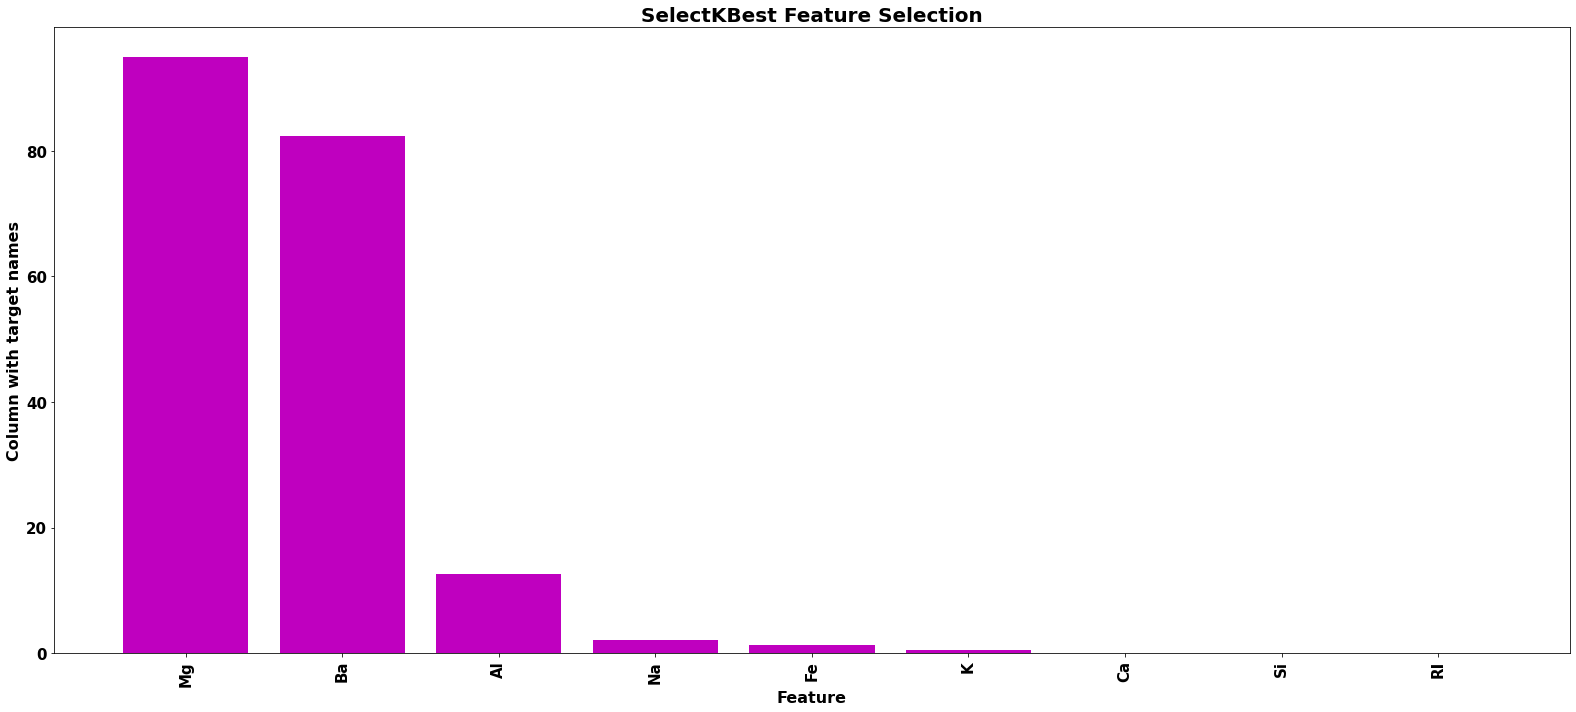

In [84]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Column with target names",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()


In [85]:
# Observations:

# After comparing both the correlation(r) coefficients and SelectKBest feature scores

# I can drop columns RI,Si,Ca and K as these features have both

# very weak correlations as well as low feature scores with SelectKBest method


# Hence I will be dropping RI,Si,Ca and K

In [86]:
# Dropping columns from the dataframe
df.drop(["RI","Ca","Si","K"],axis=1,inplace=True)
x.drop(["RI","Ca","Si","K"],axis=1,inplace=True)

# Checking Multicollinearity between features using variance_inflation_factor (VIF)


In [87]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x[list(x.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,20.940465,Na
2,12.718755,Al
1,6.078129,Mg
3,1.660687,Ba
4,1.339409,Fe


In [88]:
# Observations:

# Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features

# As there are multiple features (2) with VIF values > 10, hence dropping only one column "Na" in this case 

# I will check again for multi collinearity after dropping this column

In [89]:
#Dropping column "Na"
x=x.drop(["Na"],axis=1)
df=df.drop(["Na"],axis=1)

In [90]:
#Checking multicollinearity again after dropping "Na" column

In [91]:
X = x[list(x.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,3.940348,Al
0,3.189316,Mg
2,1.650157,Ba
3,1.334488,Fe


In [92]:
# Observations:

# VIF score is reduced after dropping "Na" column and all the remaining X columns are having VIF factor < 10

# I will use this data for further processing of model building

# Pre-Processing

In [93]:
x.head()

,Mg,Al,Ba,Fe
0,4.49,1.10,0.0,0.0
1,3.60,1.36,0.0,0.0
2,3.55,1.54,0.0,0.0
3,3.69,1.29,0.0,0.0
4,3.62,1.24,0.0,0.0


In [94]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Type of glass, dtype: int64

# Checking Outliers

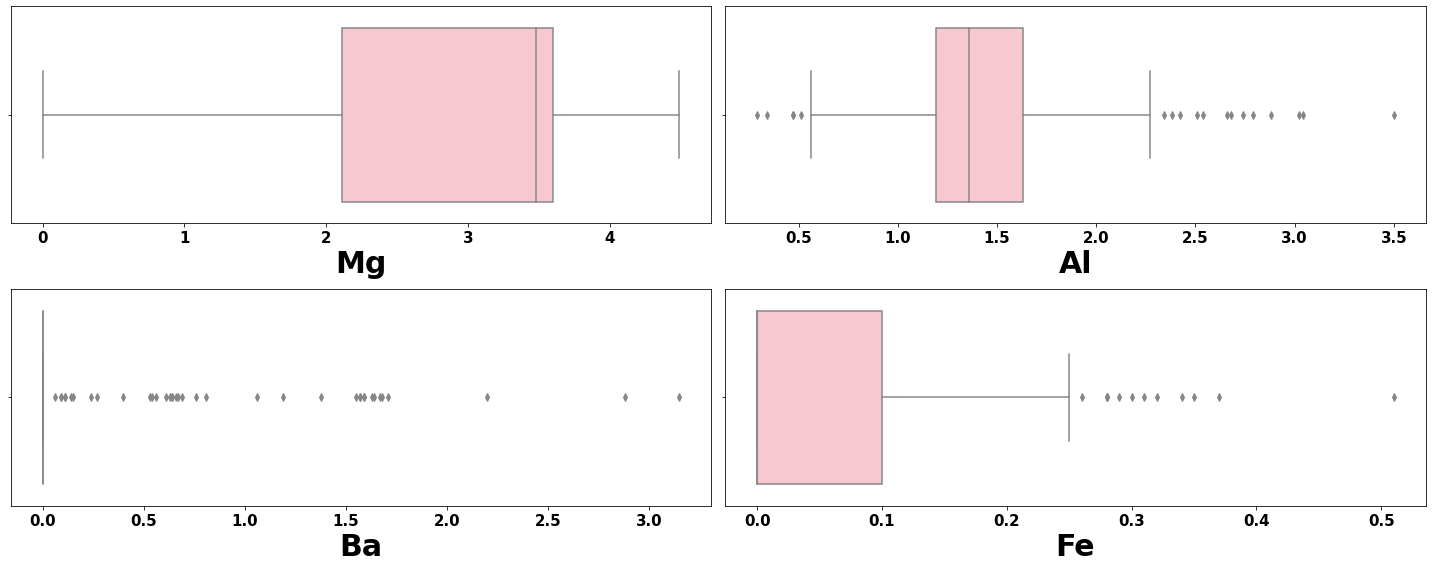

In [95]:
# Checking outliers on the continuous data
plt.figure(figsize=(20,8),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='pink')
        plt.xlabel(column,fontsize=30,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

In [96]:
# Observations:

# There are outliers present in variables 'Al','Ba' and 'Fe'

# No outliers present in the variable "Mg"

# Removing Outliers using z-score method

In [97]:
x.shape

(214, 4)

In [98]:
y.shape

(214,)

In [99]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
np.where(z>3)


(array([106, 145, 162, 163, 163, 171, 172, 174, 189, 203, 207, 213]),
 array([2, 3, 3, 1, 2, 1, 1, 3, 2, 2, 2, 2]))

In [100]:
# Removing the rows in both x and y where the outliers are present in x features with continuous data
x1=x[(z<3).all(axis=1)]
y1=y[(z<3).all(axis=1)]

In [101]:
x1.shape

(203, 4)

In [102]:
y1.shape

(203,)

In [103]:
# Data loss calculation with z-score method
loss_percent_zscore=round((x.shape[0]-x1.shape[0])/x.shape[0]*100,1)
loss_percent_zscore

5.1

In [104]:
# Observations:

# Data loss with z-score method is 5.1%. 

# Now I will check the dataloss using IQR method as well and will take a call accordingly

# Removing Outliers using IQR method

In [105]:
# Calculate interquartile range (IQR) for x continuous data
Q1=x.quantile(0.25)
Q3=x.quantile(0.75)
IQR=Q3-Q1

# Removing the rows in both x and y where the outliers are present in x features with continuous data
x2 = x[((x>=(Q1-1.5*IQR)) & (x<=(Q3+1.5*IQR))).all(axis=1)]
y2 = y[((x>=(Q1-1.5*IQR)) & (x<=(Q3+1.5*IQR))).all(axis=1)]

In [106]:
x2.shape

(159, 4)

In [107]:
y2.shape

(159,)

In [108]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((x.shape[0]-x2.shape[0])/x.shape[0]*100,1)
display(loss_percent_IQR)

25.7

In [109]:
# Observations:

# Data loss with IQR is 25.7% which is higher than data loss with z-score (5.1%)

# Hence considering x & y data after removing outliers using zscore method for model building

# Skewness Check

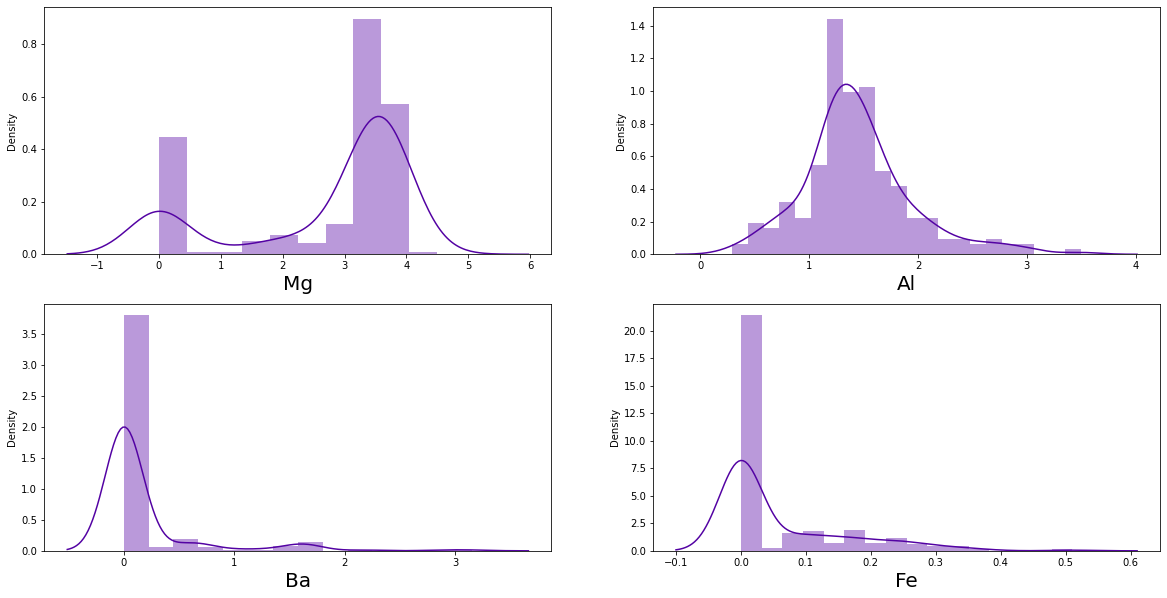

In [110]:
# Skewness of features with continuous data. We don't check skewness on categorical data and in target variable.
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in x:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [111]:
# Observatins:

# All the features are having skewed data

# Hence I need to remove or reduce the skewness of all these features to get better model performance

In [112]:
x.skew().sort_values(ascending=False) 

Ba    3.416425
Fe    1.754327
Al    0.907290
Mg   -1.152559
dtype: float64

In [113]:
# Observations:

# Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are all variables beyond this range

# I will apply various methods to remove skewness and will consider the one with lowest skewness

# Transforming data to remove skewness

In [114]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(x)
x_tra=pd.DataFrame(data=x_pwr,columns=x.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

Ba    1.824175
Fe    0.858508
Al    0.000219
Mg   -0.889528
dtype: float64

In [115]:
# Observations:

# Skewness is reduced using powerTransformer method.I will check with other methods to remove skewness



In [116]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(x)
x_qtr=pd.DataFrame(data=x_qt,columns=x.columns)
x_qtr.skew().sort_values(ascending=False)

Ba    1.714653
Fe    0.801968
Al    0.001091
Mg   -0.164567
dtype: float64

In [117]:
# Observation:

# Skewness is reduced further with quantile transformer method compared to power tansformer

In [118]:
# Overall, skewness with "Quantile Transformer" is less, 
# Hence I will consider the data from "Quantile transformer" method

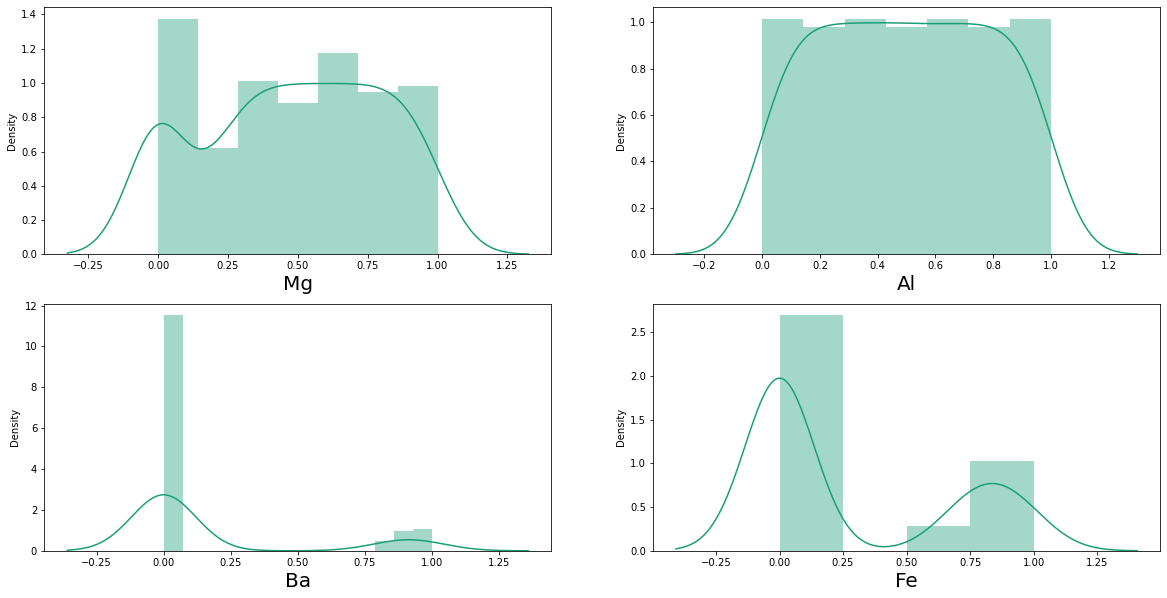

In [119]:
# Visually checking skewness after applying "Quantile Transformer method"
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_qtr:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(x_qtr[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


In [120]:
# Observations:

# As the skewness is least using "quantile transformer"

# I am using transformed x data from "quantile transformer" for model building

# Scaling data

In [121]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_qtr_scaled=sc.fit_transform(x_qtr)
x=pd.DataFrame(data=x_qtr_scaled,columns=x.columns)
x.head(5)

,Mg,Al,Ba,Fe
0,1.640559,-1.173396,-0.46376,-0.690657
1,0.839210,-0.023833,-0.46376,-0.690657
2,0.505315,0.550949,-0.46376,-0.690657
3,1.210205,-0.363844,-0.46376,-0.690657
4,0.957929,-0.630996,-0.46376,-0.690657


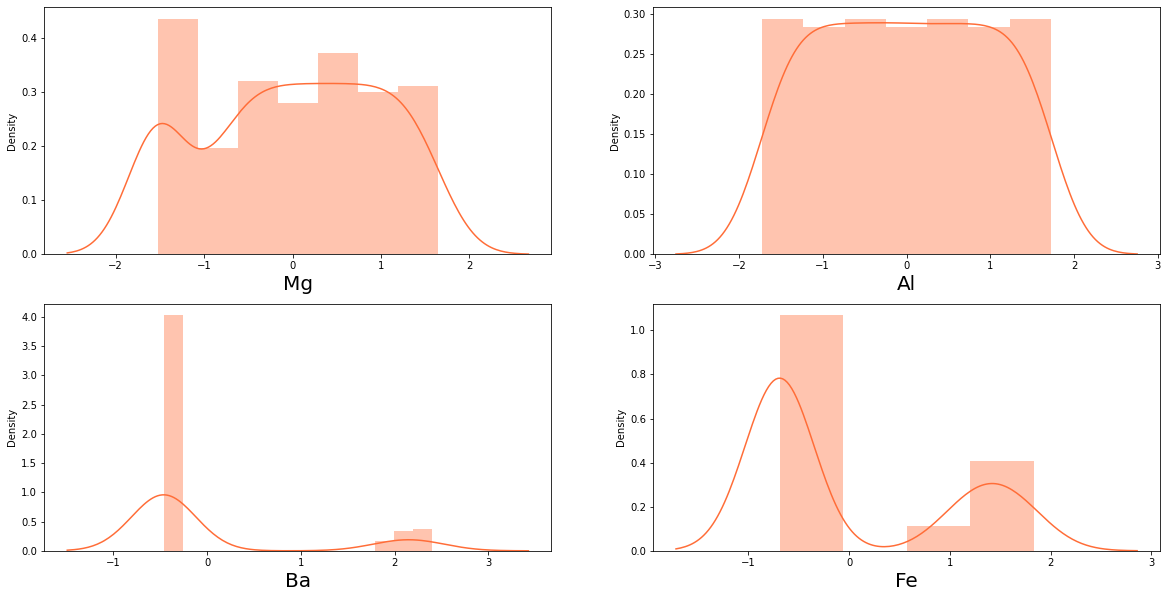

In [122]:
# Visually checking the distribution plots after scaling the data
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# SMOTE for classfication

In [123]:
# As the target variable classes are imbalanced,

# Using the random oversampling technique "SMOTE" for balancing the classes in target variable



In [124]:
# Checking the value count of target column
y.value_counts()

0    163
1     51
Name: Type of glass, dtype: int64

In [125]:
x.shape

(214, 4)

In [126]:
y.shape

(214,)

In [127]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [128]:
# Checking the value count of target column
y.value_counts()

0    163
1    163
Name: Type of glass, dtype: int64

In [129]:
# Observations:

# Classes are balanced in the target column

In [130]:
x.shape

(326, 4)

In [131]:
y.shape

(326,)

0    163
1    163
Name: Type of glass, dtype: int64


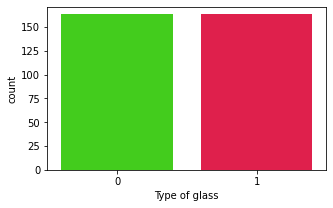

In [132]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(y.value_counts())
sns.countplot(y,palette='prism')
plt.show()

In [133]:
# Observations:

# Classes are balanced in the target variable

# EDA part is completed and I will proceed with Model Building

In [134]:
# As target variable has two classes, I will use binary classification model and starts with LogisticRegression


# Model Building

In [258]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

lr=LogisticRegression()  # Defining instance for logisticregression

# Finding the best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append(abs((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Table of random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Table of random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference


In [147]:
# Was unable to generate the random state. Tried to increase the range as well.


In [259]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

In [308]:
# Tried different random state below and got the 18 as best result

In [260]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.9545454545454546


In [261]:
# Printing classificatin report

print(classification_report(y_test,pred_test))  

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.94      0.97      0.96        34

    accuracy                           0.95        66
   macro avg       0.96      0.95      0.95        66
weighted avg       0.95      0.95      0.95        66



In [262]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[30  2]
 [ 1 33]]


# Cross Validation for Logistic Regression

In [263]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation table


,No of Folds,Cross Validation Score,Model Score,Difference
1,3,93.252350,95.454545,0.022022
7,9,93.243243,95.454545,0.022113
4,6,93.232323,95.454545,0.022222
2,4,92.923818,95.454545,0.025307
5,7,92.896789,95.454545,0.025578
8,10,92.888258,95.454545,0.025663
3,5,92.326340,95.454545,0.031282
6,8,91.730183,95.454545,0.037244
0,2,90.184049,95.454545,0.052705


In [176]:
# Observations:

# Getting the no. folds where the delta is least between cross validation and model scores from the below code.

#  In this case, selected CV=3 from the above table

In [264]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
BCV

3

In [265]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 93.25235020953676 
The accuracy score is: 95.45454545454545
Difference is: 0.02202195245008698


# Other Classification Algorithms

In [266]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier




# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]
        

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Appending "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference


Model: GaussianNB()
Accuracy Score:
89.39393939393939
Confusion Matrix:
[[31  1]
 [ 6 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.97      0.82      0.89        34

    accuracy                           0.89        66
   macro avg       0.90      0.90      0.89        66
weighted avg       0.90      0.89      0.89        66

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
95.45454545454545
Confusion Matrix:
[[31  1]
 [ 2 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.94      0.96        34

    accuracy                           0.95        66
   macro avg       0.95      0.95      0.95        66
weighted avg       0.96      0.95      0.95        66

-------------------------------------------

,Model,Model Score,Cross Validation Score,Difference
3,KNeighborsClassifier(),90.909091,90.805867,0.001032
2,Decision Tree Classifier(),95.454545,93.858308,0.015962
6,RandomForestClassifier(),95.454545,93.552497,0.019020
8,GradientBoostingClassifier(),95.454545,93.552497,0.019020
1,GaussianNB(),89.393939,91.420319,0.020264
0,LogisticRegression(),95.454545,93.252350,0.022022
4,SGDClassifier(),95.454545,92.946540,0.025080
9,AdaBoostClassifier(),95.454545,92.946540,0.025080
7,ExtraTreesClassifier(),96.969697,93.252350,0.037173
10,XGBClassifier(),98.484848,94.166950,0.043179


In [267]:
# Getting the best model where the least difference between cross validation score and model score
BMS=score_table["Model"][score_table["Difference"]==score_table["Difference"].min()]
BM=np.array(BMS)[0]
BM  # Best Model

'KNeighborsClassifier()'

# Hyper Parameter Tuning

In [268]:
from sklearn.model_selection import GridSearchCV

In [289]:


KNN=KNeighborsClassifier()
dict={"n_estimators":[50,100,200],
      "max_depth":[2,4],
      "min_samples_split":[2,5],
      "bootstrap":[True,False],
      "criterion":["gini","entropy","log_loss"]}
      #,"max_fetaures":['sqrt','log2']}


In [290]:
dict2={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],"weights":['uniform', 'distance']}

In [291]:
gd=GridSearchCV(estimator=KNN,param_grid=dict2,cv=3)

In [292]:
gd.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

In [293]:
gd.best_params_

{'algorithm': 'auto', 'weights': 'distance'}

In [294]:
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


90.9090909090909
[[29  3]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.91      0.91      0.91        34

    accuracy                           0.91        66
   macro avg       0.91      0.91      0.91        66
weighted avg       0.91      0.91      0.91        66



In [295]:
score=cross_val_score(KNN,x,y,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 90.80586702910863 
The accuracy score is: 90.9090909090909
Difference is: 0.0010322387998228377


# #Observation for KNeighborsClassifier()


In [296]:
# Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 0.0010322387998228377

# Model with default parameters: The difference between Cross Validation Score and model score is 0.001032

# Both are the same. Hence choosing the dafault parameter only

# AUC ROC Curve

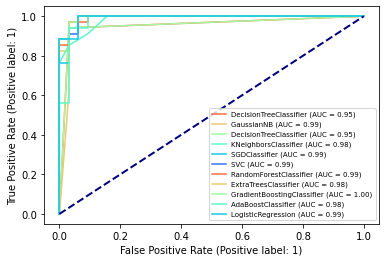

In [305]:
# Checking AUC ROC Curve to compare the multiple models

# from sklearn import datasets
from sklearn import metrics     
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

# models=[('GaussianNB()',GaussianNB()),('RandomForestClassifier()',RandomForestClassifier()),
#        ('KNeighborsClassifier()',KNeighborsClassifier()),
#        ('SVC()',SVC()),(' Decision Tree Classifier()', Decision Tree Classifier()),
#        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
#        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]
#        

# Initially Plotting the AUC ROC curve for Random Forest
disp=plot_roc_curve(models[1][1],x_test,y_test)  

# Basically plot_roc_curve function plot the roc_curve for the classifier. Here we store the first gragh in the variable "disp"
# and access its axis and provide to the next plot_roc_curve function, so that the plot appear of the axes of the first graph only
# If we dont specify "ax", it will plot multiple graphs

# Plotting the AUC ROC curve for remaining models with same axis of Random Forest
plot_roc_curve(models[0][1],x_test,y_test,ax=disp.ax_) 
plot_roc_curve(models[1][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[2][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[3][1],x_test,y_test,ax=disp.ax_)

plot_roc_curve(models[4][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[5][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[6][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[7][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[8][1],x_test,y_test,ax=disp.ax_)


plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')

plt.legend(prop={'size':7},loc='lower right')
plt.show()


In [298]:
# Observations:

# All models are performing well.

# Other models are performing better. 

# But I am selecting KNN as best model

# On the basis of least difference between model accuracy score & cross validation score and also based on AUC ROC score. 

# Hence saving KNeighborsClassifier as the final model for deployment



# Model Saving

In [306]:
import pickle
filename='glass-identification.pkl'
pickle.dump(models[2][1], open(filename,'wb'))  # saving the Decision Tree Classifier model

# Conclusion

In [307]:


loaded_model=pickle.load(open('glass-identification.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

conclusion=pd.DataFrame([loaded_model.predict(x_test),y_test.squeeze()],index=["Predicted","Original"])
conclusion.T

90.9090909090909


,Predicted,Original
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
61,1,1
62,0,0
63,0,1
64,1,1
